# Ejercicio 3.5

La idea de este código es que sea muy explicativo de cada paso, e incluya las explicaciones principales que es conveniente que los estudiantes reciban en la clase.

Link de la Clase 5: https://docs.google.com/document/d/19mxLrWwHCKom41Aw767h3jH0qknzUL6ef5WoxUzcr9o/edit

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Elijo T
T = 10

# Elijo T1
T1 = 2

# ESTUDIANTE
# En la Serie de Fourier incide la relación entre T1 y T así que es útil definir esta variable
rel_T = T1/T

Entonces voy a tener un pulso cada T segundos, centrado en el multiplo de T, con ancho 2*T1, como se muestra en la imagen.

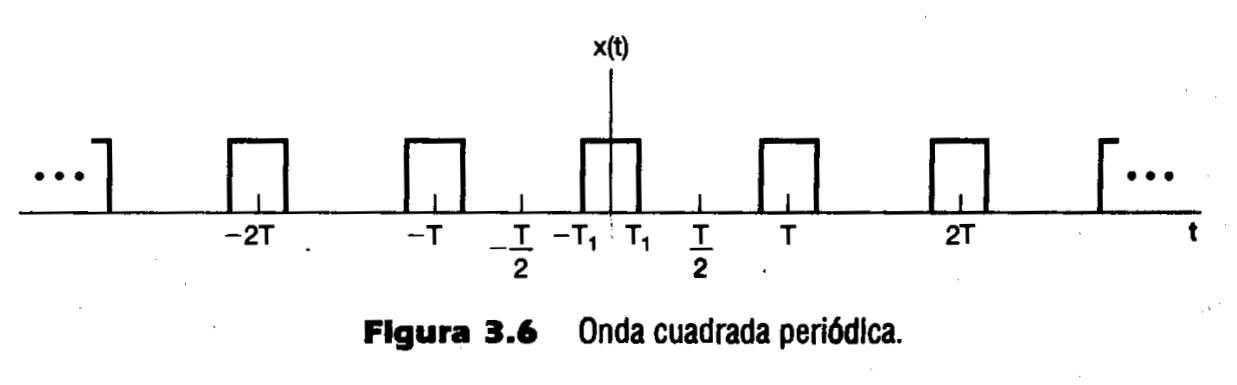

## Docente: explicación 1

Recordar que queremos graficar $a_{k}$, el cual se expresa de la siguiente forma: $a_{k} = \dfrac{sin(k\omega_{0}T_{1})}{k\pi}$.

Para poder calcular $a_{k}$ me falta definir el eje $k$, pero, ¿con qué criterio construirlo? En primer lugar veamos que cada elemento de $k$ tiene que ser entero, por lo que el paso va a ser 1. Por consiguiente, solo queda definir el principio y el final.
Este vector $k$ corresponde a mi eje de frecuencia. En este caso que solo me interesa graficar $a_{k}$, basta con elegirme un rango que permita ver los valores de mayor magnitud (notar que tiende a 0 para valor grandes de $k$). Es similar a cuando se decide el eje de frecuencia de un Diagrama de Bode.

Importante: si eventualmente quisiéramos usar la ecuación de síntesis con estos coeficientes $a_{k}$ calculados, tenemos que tener más cuidado, porque la decisión de este límite impacta directamente en el resulado que voy a tener luego de aplicar esta ecuación. En otras palabras, incide en la señal reconstruida $x_{r}(t)$ que voy a obtener.

In [4]:
# Construimos un eje k, donde los limites superiores e inferior se expresar como una variable para poder ajustarla en caso que sea necesario

# epsilon de la máquina (para evitar errores numéricos)
eps = np.finfo(float).eps
print("eps: ", eps)

# Fijamos el valor maximo del eje de k que queremos
k_max = 20

# Creamos un eje k simetrico
k = np.arange(-k_max, k_max)

# Ahora que tenemos el k, calculamos los coeficientes ak

ak = np.sin(2*np.pi*rel_T*k)/(k*np.pi+eps)

# Ahora falta calcular el valor en k = 0
# En que posicion del arreglo k esta k = 0? En k[k_max], porque es simetrico con respecto a 0

ak[k_max] = 2*rel_T

eps:  2.220446049250313e-16


Text(0.5, 1.0, 'Coeficientes $a_{k}$')

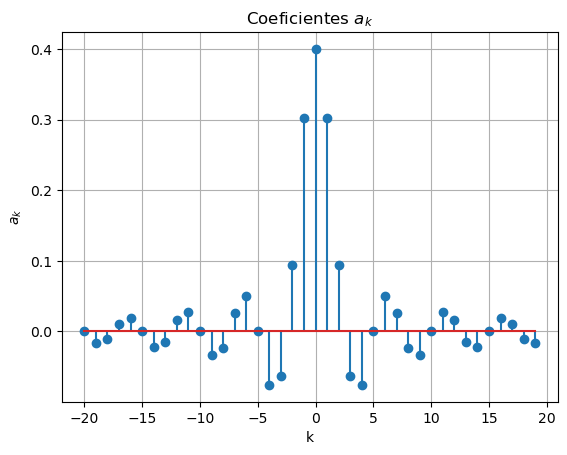

In [5]:
plt.figure()
plt.stem(k, ak)
plt.grid()
plt.xlabel('k')
plt.ylabel('$a_{k}$')
plt.title('Coeficientes $a_{k}$')

En general se grafica módulo y fase de los coeficientes, pero dado que en este caso son reales, positivos y negativos, se prefirió graficarlo así, y sin el valor absoluto (módulo).

**Pregunta:** Modifique la relación $T1/T$. ¿Qué observa?

## Docente: explicación 2


Ahora voy a proceder a construir la señal que pasa por todos estos puntos, es decir que en lugar de usar el vector $k$, voy a usar uno más denso. A su vez voy a graficar las envolventes: observando la expresión se puede ver que corresponde a $1/k\pi$.

Text(0.5, 1.0, 'Coeficientes $a_{k}$ junto al gráfico de su función obtenida con un vector más denso de $k$')

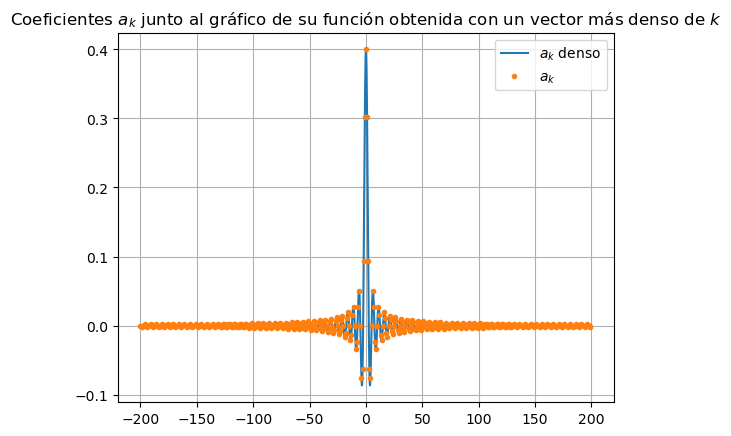

In [12]:
# Me construyo un eje de frecuencia mas denso
paso_k_denso = 0.01
k_denso = np.arange(-k_max, k_max, paso_k_denso)

# Calculo el "ak denso", el cual claramente va a pasar por los puntos de ak
ak_denso = np.sin(2*np.pi*rel_T*k_denso)/(k_denso*np.pi + eps)

# Calculo el indice que corresponde a ak_denso = 0
# Tengo que multiplicar k_max por la cantidad de muestras que tengo en una unidad (pensar que antes el paso era 1)

# Muestras por unidad
muestras_por_unidad = int(1/paso_k_denso)

# Asigno el valor correspondiente en k_denso = 0
ak_denso[k_max*muestras_por_unidad] = 2*rel_T

# Procedo a graficar esto
plt.figure()
plt.plot(k_denso, ak_denso)
plt.plot(k, ak, '.')
plt.legend(['$a_{k}$ denso', '$a_{k}$'])
plt.grid()
plt.title('Coeficientes $a_{k}$ junto al gráfico de su función obtenida con un vector más denso de $k$')




En lo que sigue calculo y agrego al gráfico anterior las envolventes.

Text(0.5, 1.0, 'Coeficientes $a_{k}$ junto al gráfico de su función obtenida con un vector más denso de $k$, y sus envolventes asociadas')

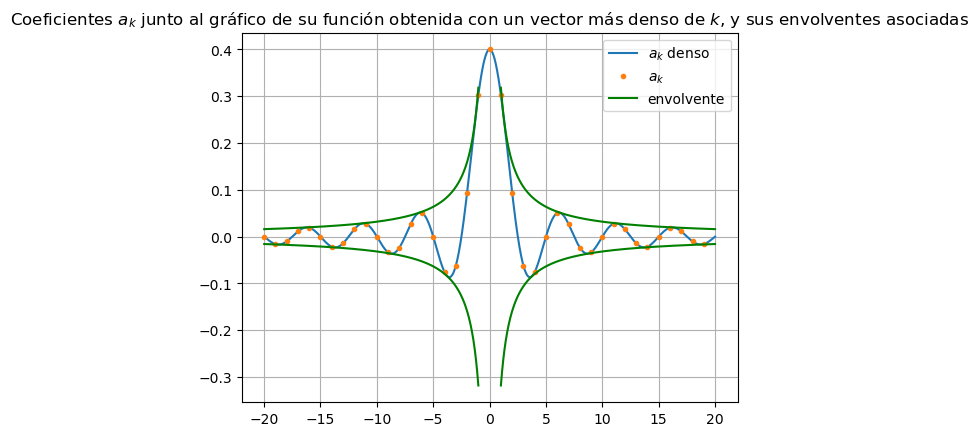

In [7]:
# Entre 0 y 1 la envolvente da problemas porque toma valores muy grandes, entonces la calculamos para valores mas grandes que 1
k_denso_positivo = np.arange(1, k_max, paso_k_denso)

# Calculo de la envolvente
envolvente = 1/(k_denso_positivo*np.pi)

# Agregamos la envolvente al grafico anterior
plt.figure()
plt.plot(k_denso, ak_denso)
plt.plot(k, ak, '.')
plt.plot(k_denso_positivo, envolvente, 'g')
plt.plot(-k_denso_positivo, -envolvente, 'g')
plt.plot(k_denso_positivo, -envolvente, 'g')
plt.plot(-k_denso_positivo, envolvente, 'g')

plt.legend(['$a_{k}$ denso', '$a_{k}$', 'envolvente'])
plt.grid()
plt.title('Coeficientes $a_{k}$ junto al gráfico de su función obtenida con un vector más denso de $k$, y sus envolventes asociadas')


## Docente: explicación 3


Ahora procedemos a reconstruir la señal a partir de los coeficientes, es decir, aplicamos la ecuación de síntesis:

$
x_{r}(t) = \sum_{k = -\infty}^{+\infty}a_{k}e^{jk\omega_{0}t}
$

En consecuencia, notar que para reconstruir la señal en un instante puntual $t_{i}$, tenemos que hacer una sumatoria en $k$:

$
x_{r}(t_{i}) = \sum_{k = -\infty}^{+\infty}a_{k}e^{jk\omega_{0}t_{i}}
$

En resumen, voy a tener que realizar esta sumatoria para cada instante de señal que quiera reconstruir. Parece redundante plantearlo de esta manera, pero ayuda a ver los pasos que tenemos que seguir en el código:

1) Dado que la sumatoria en $k$ es infinita en la expresión vista, debemos tener cuidado de considerar un vector $k$ suficientemente grande. Un criterio para elegirlo, puede ser chequear que los coeficientes asociados a los valores más grandes del vector, sean cercanos a 0, por lo que su aporte sea casi insignificante.

2) Definir el eje de tiempo donde quiero reconstruir, es decir, cuáles $t_{i}$ quiero calcular. Notar que este eje de tiempo no tiene por qué ser igual al de la señal original.

3) Construir un bucle que recorra cada instante $t_{i}$, donde en cada iteración se haga la sumatoria en $k$ correspondiente, de forma de hallar $x_{r}(t_{i})$.



C:\Users\Ing. Biologica\AppData\Local\Temp\ipykernel_13900\1236581825.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  xr[i] = np.dot(ak, aux_exp)                # producto interno


Text(0.5, 1.0, 'Reconstrucción de la señal temporal a partir de 40 coeficientes')

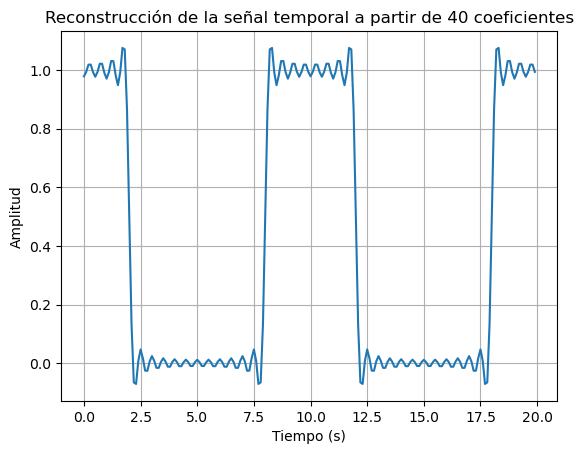

In [8]:
# Bandera que controla como hago la reconstruccion
usar_producto_interno = True

# Me defino un vector de tiempo donde va a vivir mi senal reconstruida

t_max = 2*T         # Quiero ver dos periodos
h_t = 0.1           # Elijo el paso del vector de tiempo
t_rec = np.arange(0, t_max, h_t)

# Construyo xr
xr = np.zeros_like(t_rec)        # creo xr con la misma estrutura de t_rec e inicializo todos los valores en 0

# TODO: pensar si se puede hacer vectorial
# TODO: cuando se suman series, se hace en orden revertido para evitar problemas numéricos
for i in range(len(t_rec)):      # recorro el eje de tiempo. en cada iteracion calculo xr(t_i)
    t_i = t_rec[i]
    # Una vez definido el instante en el que voy a reconstruir la senal, procedo a hacer la sumatoria en k
    # Esta hecho de dos manera, ambas funcionan
    if usar_producto_interno:    
        aux_exp = np.exp(1j*k*2*np.pi*(1/T)*t_i)
        xr[i] = np.dot(ak, aux_exp)                # producto interno
    else:
        aux = 0
        for j in range(len(k)):
            aux += ak[j] * np.exp(1j*k[j]*2*np.pi*(1/T)*t_i)
        xr[i] = aux
    
plt.figure()
plt.plot(t_rec, xr)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.title('Reconstrucción de la señal temporal a partir de '+ str(len(k)) + ' coeficientes')
    



Notar que la señal reconstruida se parece a lo que esperábamos en cuanto a su forma, $T$ y $T_{1}$, pero posee oscilaciones. Para intentar achicarlas, podemos considerar más coeficientes para reconstruir.

C:\Users\Ing. Biologica\AppData\Local\Temp\ipykernel_13900\2516757534.py:3: RuntimeWarning: invalid value encountered in true_divide
  ak = np.sin(2*np.pi*rel_T*k)/(k*np.pi)
C:\Users\Ing. Biologica\AppData\Local\Temp\ipykernel_13900\2516757534.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  xr[i] = np.dot(ak, aux_exp)                # producto interno


Text(0.5, 1.0, 'Reconstrucción de la señal temporal a partir de 400 coeficientes')

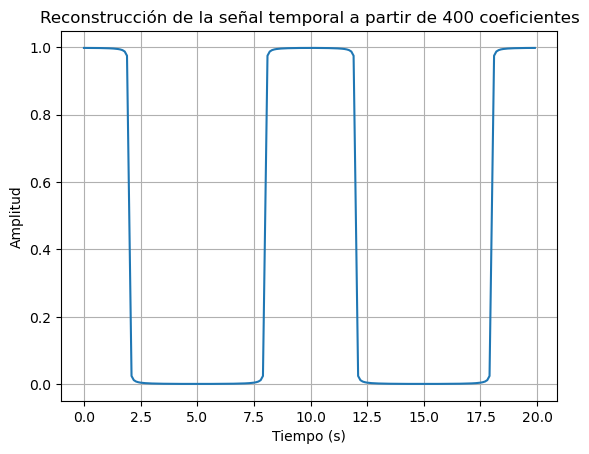

In [9]:
k_max = 200
k = np.arange(-k_max, k_max)
ak = np.sin(2*np.pi*rel_T*k)/(k*np.pi)
ak[k_max] = 2*rel_T

# Reconstrucción
for i in range(len(t_rec)):      # recorro el eje de tiempo. en cada iteracion calculo xr(t_i)
    t_i = t_rec[i]
    # Una vez definido el instante en el que voy a reconstruir la senal, procedo a hacer la sumatoria en k
    aux_exp = np.exp(1j*k*2*np.pi*(1/T)*t_i)
    xr[i] = np.dot(ak, aux_exp)                # producto interno
    
plt.figure()
plt.plot(t_rec, xr)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.title('Reconstrucción de la señal temporal a partir de '+ str(len(k)) + ' coeficientes')


Claramente disminuyeron las oscilaciones. Notar que cuando tomamos 40 coeficientes, ya los últimos tenían una amplitud muy baja comparado a los cercanos a 0. Al reconstruir con 400 coeficientes, solo agregamos coeficientes con todavía menos amplitud que los mencionados. Es destacable que estos coeficientes si bien no modifican en gran medida la forma de la señal, le dan una definición más fina o exacta. Esto es porque corresponden a señales de alta frecuencia, por lo tanto, son imprescindibles si queremos construir transciones rápidas, como en la parte de la señal donde se da el salto de 0 a 1.